In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/merged_climate_iom_data.csv')

We first do a quick exploratory view of the variables with `describe()`.

In [4]:
df.describe()

,year,month,internally_displaced_persons,temperature_2m,total_precipitation_sum,potential_evaporation_sum,start_year,start_month,end_year,end_month,...,en.ghg.n2o.mt.ce.ar5,en.ghg.n2o.pi.mt.ce.ar5,en.ghg.n2o.tr.mt.ce.ar5,en.ghg.n2o.wa.mt.ce.ar5,er.fsh.aqua.mt,er.fsh.capt.mt,er.fsh.prod.mt,er.h2o.fwtl.k3,er.h2o.intr.k3,sp.pop.totl
count,1060.000000,1060.000000,1.060000e+03,1060.000000,1060.000000,1060.000000,1060.000000,454.000000,524.000000,517.000000,...,1060.000000,1060.000000,1060.000000,1060.000000,1.060000e+03,1.060000e+03,1.060000e+03,1060.000000,1060.000000,9.170000e+02
mean,2018.134906,6.793396,3.205267e+06,297.562249,0.086803,-0.293220,2018.306697,5.724670,2018.625954,7.754352,...,99.570242,129.384210,138.397911,198.585199,3.182011e+05,2.660877e+05,5.842887e+05,118.230210,106.260388,4.751231e+07
std,2.829380,3.418794,6.227428e+06,5.788090,0.099749,0.124470,2.897266,3.629832,2.900744,3.581770,...,146.657462,225.243562,213.109257,297.487917,1.809991e+06,8.279797e+05,2.608976e+06,218.295634,251.997548,6.337362e+07
min,2011.000000,1.000000,1.660000e+02,269.856702,0.000023,-0.859473,2004.552786,1.000000,2011.000000,1.000000,...,1.038000,0.000000,-128.157246,0.090000,0.000000e+00,2.500000e+01,7.620000e+02,-1009.477324,-83.875863,6.817400e+04
25%,2016.000000,4.000000,2.433945e+05,295.334626,0.007309,-0.343364,2016.559451,2.000000,2017.000000,5.000000,...,4.743400,8.000000,2.454000,2.416000,5.400000e+02,3.167766e+04,3.902700e+04,5.186000,13.007000,1.123945e+07
50%,2018.000000,7.000000,9.968685e+05,297.978758,0.050029,-0.272000,2018.276037,6.000000,2019.000000,8.000000,...,9.799400,57.000000,63.000000,5.959500,7.686000e+03,6.000200e+04,8.699710e+04,26.935000,45.205280,2.171384e+07
75%,2020.000000,10.000000,4.577844e+06,300.596726,0.139827,-0.219129,2020.000000,8.750000,2021.000000,11.000000,...,112.009447,129.552726,189.996523,271.589092,3.067670e+05,2.654320e+05,5.827360e+05,118.155016,106.919808,4.104877e+07
max,2023.000000,12.000000,9.545158e+07,310.802629,0.692809,-0.020296,2030.885344,12.000000,2024.000000,12.000000,...,792.000000,931.000000,995.000000,935.000000,1.611824e+07,7.361121e+06,2.315606e+07,1068.369720,2018.700000,2.699518e+08


We believe the kind of disaster type will affect the number of affected people and this will have an impact on the number of displaced people.

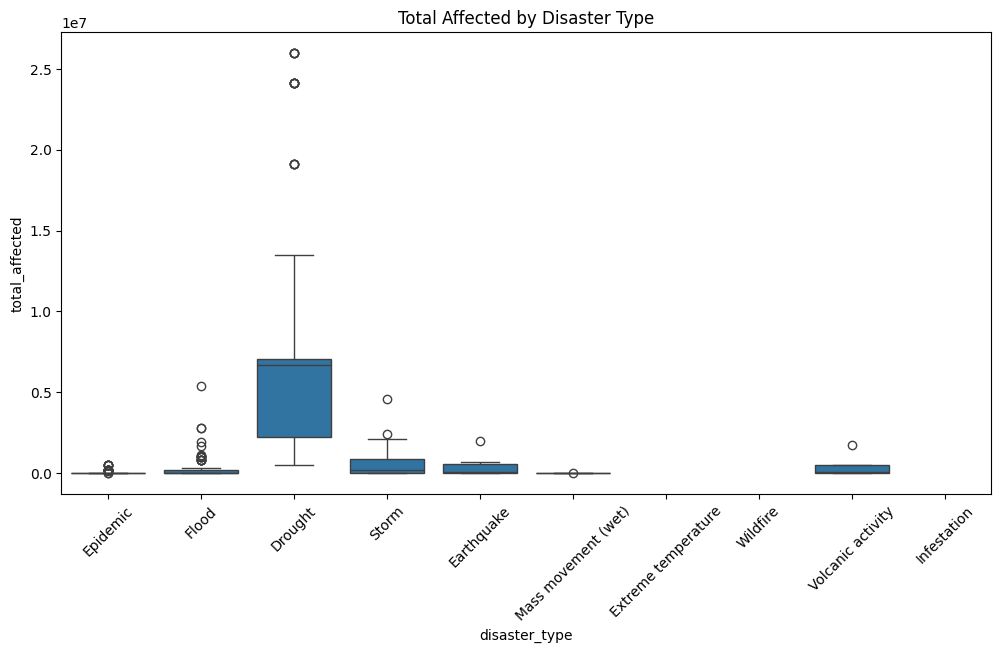

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='disaster_type', y='total_affected', data=df)
plt.xticks(rotation=45)
plt.title("Total Affected by Disaster Type")

plt.show()

As a next step, we'll explore the correlation of variables. Our intuitions is that given that we are using a lot of variables and many of them are related we will have a lot of correlation but also high colinearity. 

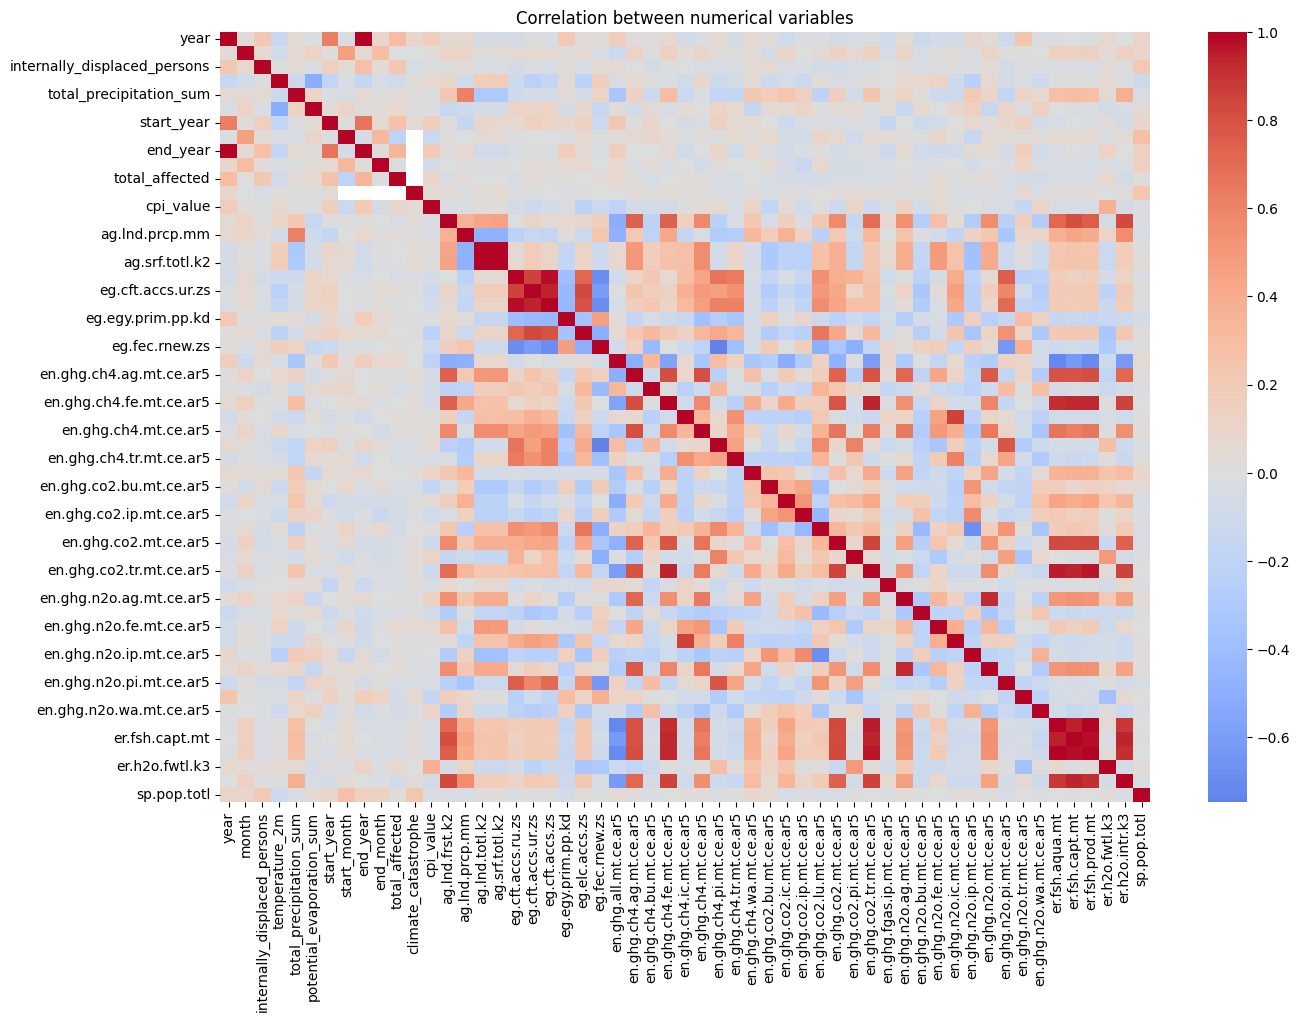

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between numerical variables")
plt.show()

For more interpretability, we are interested in seeing: what are the most correlated variables with our target?

In [7]:
top_corr = corr['internally_displaced_persons'].sort_values(ascending=False)
top_corr = top_corr[top_corr.index != 'internally_displaced_persons']
top_corr = top_corr.head(10)
print("Top 10 variables correlated with internally_displaced_persons:")
print(top_corr)


Top 10 variables correlated with internally_displaced_persons:
end_year                   0.287581
total_affected             0.223891
year                       0.222459
sp.pop.totl                0.214084
start_year                 0.152837
month                      0.072722
eg.fec.rnew.zs             0.062640
en.ghg.all.mt.ce.ar5       0.057975
en.ghg.co2.bu.mt.ce.ar5    0.055588
total_precipitation_sum    0.047382
Name: internally_displaced_persons, dtype: float64


Next, we are interested in exploring: is there a relationship between the number of displaced people and the total affected by climate catastrophes? We calculate the proportion of total IDP over population and total affected people over population.

In [ ]:
df['total_idp_over_pop'] = (df['internally_displaced_persons'] / df['sp.pop.totl'])*100
df['total_affected_over_pop'] = (df['total_affected'] / df['sp.pop.totl'])*100

In [ ]:
# We remove odd values, where the total number of IDPs is greater than 100% of the population
df = df[df['total_idp_over_pop'] < 100]

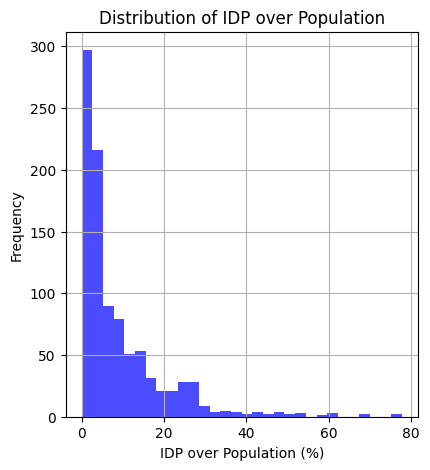

In [ ]:
# plot distribution of those two variables

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of IDP over Population')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')

plt.grid()



In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df[['total_idp_over_pop', 'internally_displaced_persons']].describe()


,total_idp_over_pop,internally_displaced_persons
count,962.00,962.00
mean,8.98,2939246.39
std,10.97,4059056.50
min,0.00,166.00
25%,1.79,326019.00
50%,4.75,1027072.50
75%,12.16,4415163.00
max,77.73,38898405.00


In [ ]:
grouped_df = df.groupby(['country_code', 'year'])[['total_idp_over_pop', 'total_affected_over_pop']].mean().reset_index()

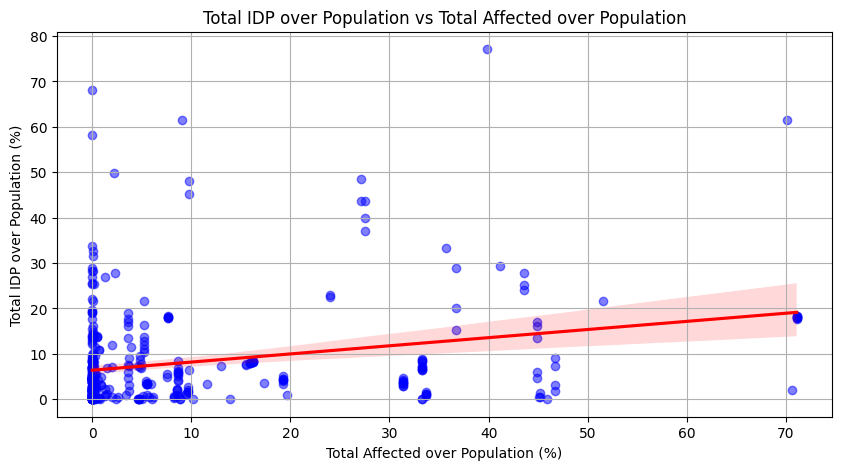

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))


sns.regplot(
    data=df,
    x="total_affected_over_pop",
    y="total_idp_over_pop",
    scatter_kws={"alpha": 0.5, "color": "blue"},
    line_kws={"color": "red"}
)

plt.title("Total IDP over Population vs Total Affected over Population")
plt.ylabel("Total IDP over Population (%)")
plt.xlabel("Total Affected over Population (%)")
plt.grid()
plt.show()



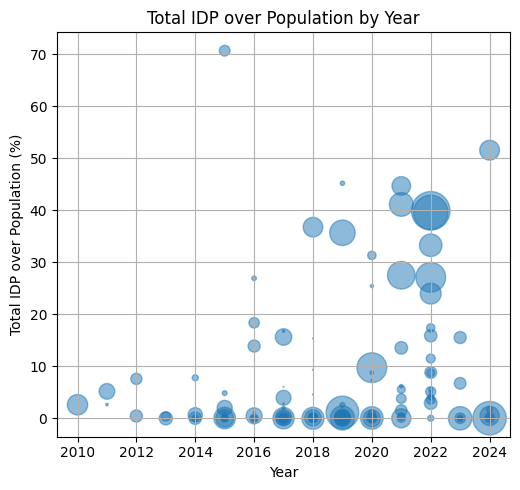

In [ ]:
# plot year on x axis, total affected on y axis and give size by total idp over pop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(grouped_df['year'], grouped_df['total_affected_over_pop'], s=grouped_df['total_idp_over_pop']*10, alpha=0.5)
plt.title('Total IDP over Population by Year')
plt.xlabel('Year')
plt.ylabel('Total IDP over Population (%)')
plt.grid()
plt.tight_layout()
plt.show()


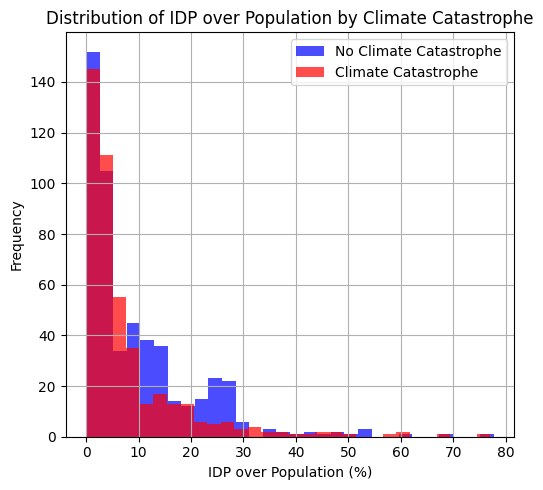

In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['climate_catastrophe'] == 0]['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7, label='No Climate Catastrophe')
plt.hist(df[df['climate_catastrophe'] == 1]['total_idp_over_pop'].dropna(), bins=30, color='red', alpha=0.7, label='Climate Catastrophe')
plt.title('Distribution of IDP over Population by Climate Catastrophe')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
